In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.25, random_state=42)

print(f'Train X:{x_train.shape}, Y:{y_train.shape}')
print(f'Validation X:{x_validation.shape}, Y:{y_validation.shape}')
print(f'Test X:{x_test.shape}, Y:{y_test.shape}')

Train X:(50000, 32, 32, 3), Y:(50000, 1)
Validation X:(2500, 32, 32, 3), Y:(2500, 1)
Test X:(7500, 32, 32, 3), Y:(7500, 1)


In [62]:
x_train, x_test, x_validation = x_train / 255.0, x_test / 255.0, x_validation / 255.0

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.softmax)
])


In [71]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [72]:
train_result = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.0582 - loss: 4.2052 - val_accuracy: 0.1916 - val_loss: 3.3955
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.2273 - loss: 3.1723 - val_accuracy: 0.2920 - val_loss: 2.9178
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.3180 - loss: 2.7175 - val_accuracy: 0.3060 - val_loss: 2.7833


In [73]:
test_result = model.evaluate(x_test, y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3217 - loss: 2.7265


In [74]:
test_result

[2.691136121749878, 0.330133318901062]

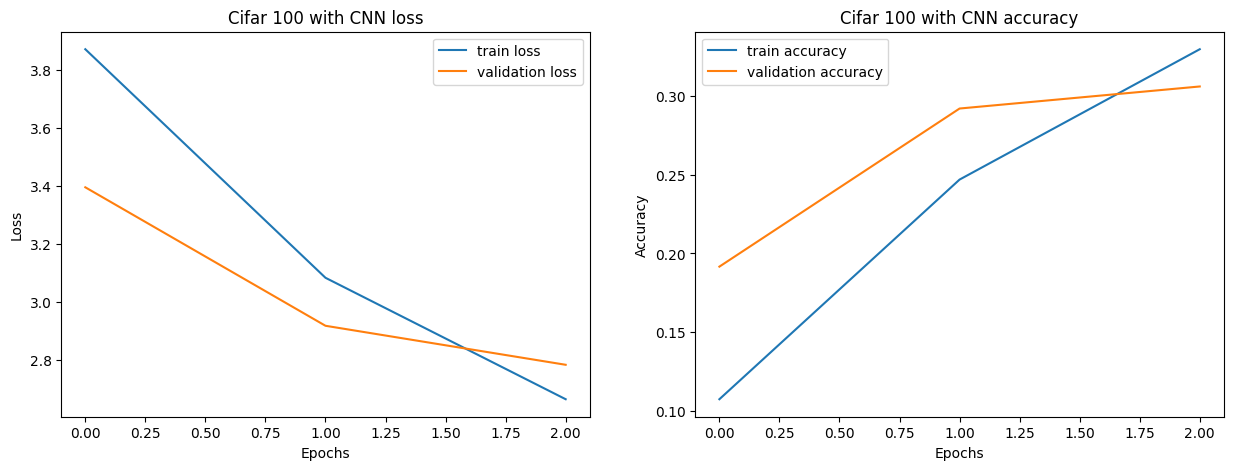

In [75]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('Cifar 100 with CNN loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('Cifar 100 with CNN accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()